In [39]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('Dataset_analyse.csv')

# Vision Macro

In [71]:
df.columns

Index(['title', 'year', 'director', 'country', 'duration', 'genre',
       'first_day', 'first_week', 'first_weekend', 'hebdo_rank',
       'total_spectator', 'copies', 'rating_press', 'rating_public', 'casting',
       'budget', 'lang', 'visa', 'award'],
      dtype='object')

In [72]:
df

,title,year,director,country,duration,genre,first_day,first_week,first_weekend,hebdo_rank,total_spectator,copies,rating_press,rating_public,casting,budget,lang,visa,award
0,rien ne va plus,1997,claude chabrol,france,6300,thriller,74295.3622,172230,368944.741401,3,458125,234,-1.0,3.0,"[""Michel Serrault"", ""Isabelle Huppert"", ""Franç...",1.549450e+08,"[""francais"", ""hongrois""]",90016,0
1,la fille sur le pont,1999,patrice leconte,france,5400,drame,75572.2000,154881,412897.600000,5,663390,198,3.4,3.6,"[""Vanessa Paradis"", ""Daniel Auteuil"", ""Claude ...",9.900000e+08,"[""francais""]",90876,1
2,grosse fatigue,1994,michel blanc,france,5220,comedie,74295.3622,417021,368944.741401,2,2015230,189,-1.0,2.7,"[""Michel Blanc"", ""Philippe Noiret"", ""Marie-Ann...",1.549450e+08,"[""francais""]",82266,1
3,braveheart,1995,mel gibson,etatsunis,9900,aventure action,56892.4000,355642,286272.200000,3,1231534,302,2.6,4.2,"[""Mel Gibson"", ""Sophie Marceau"", ""Catherine Mc...",7.200000e+07,"[""anglais""]",88091,9
4,regarde les hommes tomber,1994,jacques audiard,france,6600,thriller,74295.3622,39739,368944.741401,10,218831,46,-1.0,3.3,"[""Jean-Louis Trintignant"", ""Mathieu Kassovitz""...",1.549450e+08,"[""francais""]",84098,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,be happy,2008,mike leigh,grandebretagne,7080,comedie,18126.0000,110442,90372.000000,9,362884,128,3.9,2.7,"[""Sally Hawkins"", ""Alexis Zegerman"", ""Andrea R...",3.072000e+07,"[""anglais""]",121057,1
2201,m butterfly,1993,david cronenberg,etatsunis,6060,drame,74295.3622,32351,368944.741401,10,101680,44,-1.0,3.6,"[""Jeremy Irons"", ""John Lone"", ""Barbara Sukowa""...",1.549450e+08,"[""anglais""]",-1,0
2202,petits freres,1999,jacques doillon,france,5520,drame,74295.3622,51749,368944.741401,14,176880,-1,3.9,2.7,"[""Stephanie Touly"", ""Iliès Sefraoui"", ""Mustaph...",1.549450e+08,"[""francais""]",-1,0
2203,cookies fortune,1999,robert altman,etatsunis,7080,comedie,74295.3622,63249,368944.741401,13,239473,-1,3.8,3.3,"[""Glenn Close"", ""Julianne Moore"", ""Liv Tyler"",...",1.549450e+08,"[""anglais""]",97081,0


In [73]:
# drop columns
df = df.drop(['title', 'director', 'country', 'genre', 'casting', 'lang'], axis=1)

In [74]:
df

,year,duration,first_day,first_week,first_weekend,hebdo_rank,total_spectator,copies,rating_press,rating_public,budget,visa,award
0,1997,6300,74295.3622,172230,368944.741401,3,458125,234,-1.0,3.0,1.549450e+08,90016,0
1,1999,5400,75572.2000,154881,412897.600000,5,663390,198,3.4,3.6,9.900000e+08,90876,1
2,1994,5220,74295.3622,417021,368944.741401,2,2015230,189,-1.0,2.7,1.549450e+08,82266,1
3,1995,9900,56892.4000,355642,286272.200000,3,1231534,302,2.6,4.2,7.200000e+07,88091,9
4,1994,6600,74295.3622,39739,368944.741401,10,218831,46,-1.0,3.3,1.549450e+08,84098,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2008,7080,18126.0000,110442,90372.000000,9,362884,128,3.9,2.7,3.072000e+07,121057,1
2201,1993,6060,74295.3622,32351,368944.741401,10,101680,44,-1.0,3.6,1.549450e+08,-1,0
2202,1999,5520,74295.3622,51749,368944.741401,14,176880,-1,3.9,2.7,1.549450e+08,-1,0
2203,1999,7080,74295.3622,63249,368944.741401,13,239473,-1,3.8,3.3,1.549450e+08,97081,0


<Axes: >

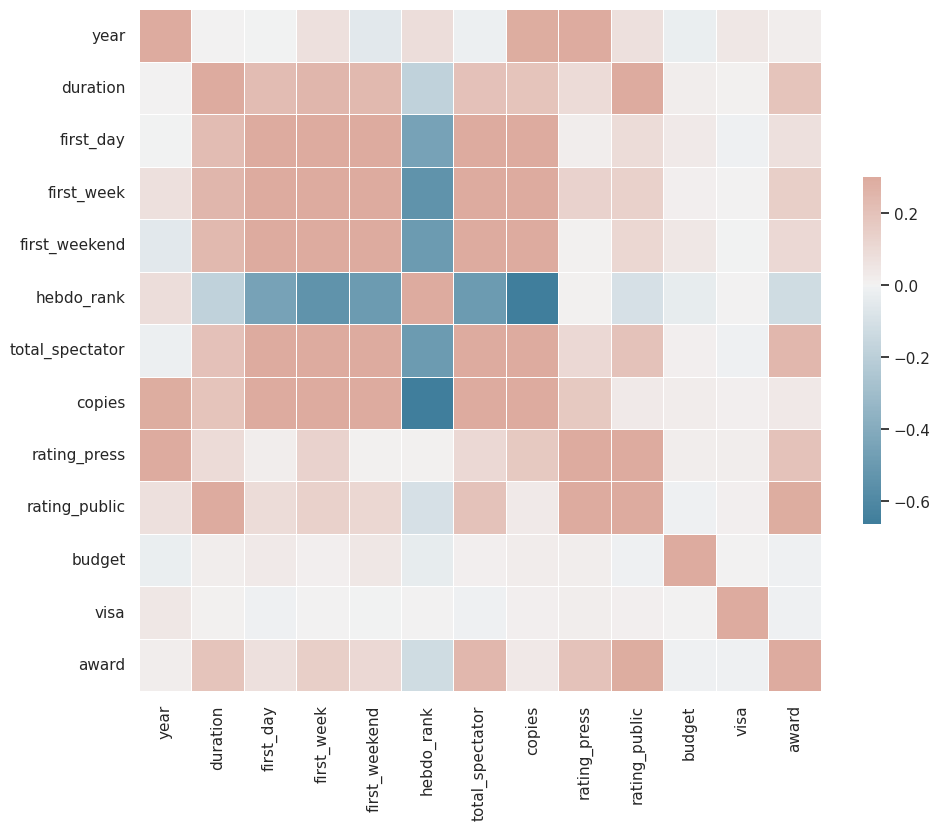

In [77]:
sns.set_theme(style='white')

# Calculer matrice de correlation 
corr = df.corr()

# Configuration de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Affichage de couleur 
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Générer matrice de correlation
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths= .5, cbar_kws={"shrink": .5})